### 1. Describir los siguientes métodos de clustering, sus casos de uso y su escalabilidad en la implementación.
#### a. K-Means
K-Means es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Es un método muy utilizado en minería de datos.
Es el algoritmo de clustering más usado y Tiene una muy buena escalabilidad con la cantidad de datos. Para utilizar K-Means debemos especificar el número K de grupos a encontrar.

El algoritmo K-Means sigue los siguientes pasos:
- Inicialización: se elige la localización de los centroides de los K grupos aleatoriamente
- Asignación: se asigna cada dato al centroide más cercano
- Actualización: se actualiza la posición del centroide a la media aritmética de las posiciones de los datos asignados al grupo

Los pasos 2 y 3 se siguen iterativamente hasta que no haya más cambios.

#### b. Mean-Shift
El algoritmo de Mean-Shift tiene aplicaciones en el campo del procesamiento de imágenes y la visión por computadora.A diferencia de la agrupación en clústeres de K-medias, no hace ninguna suposición; por tanto, es un algoritmo no paramétrico. 
El algoritmo de Mean-Shift básicamente asigna los puntos de datos a los grupos de forma iterativa al cambiar los puntos hacia la mayor densidad de puntos de datos, es decir, el centroide del grupo. La diferencia entre el algoritmo K-Means y Mean-Shift es que más adelante no es necesario especificar el número de grupos de antemano porque el número de grupos será determinado por el algoritmo de datos.

Podemos entender el funcionamiento del algoritmo de agrupamiento de Mean-Shift con la ayuda de los siguientes pasos:
- Paso 1 : Primero, comience con los puntos de datos asignados a un grupo propio.
- Paso 2 : A continuación, este algoritmo calculará los centroides.
- Paso 3 : En este paso, se actualizará la ubicación de los nuevos centroides.
- Paso 4 : El proceso se repetirá y se moverá a la región de mayor densidad.
- Paso 5 : Se detendrá una vez que los centroides lleguen a la posición desde donde no pueden moverse más.

- Ventajas: 
No es necesario hacer ninguna suposición de modelo como en K-mean o mezcla gaussiana.También puede modelar los grupos complejos que tienen forma no convexa.Solo necesita un parámetro llamado ancho de banda que determina automáticamente el número de clústeres.No hay problemas de mínimos locales como en K-means.Ningún problema generado por valores atípicos.
- Desventajas:
No funciona bien en el caso de una dimensión alta, donde el número de grupos cambia abruptamente.No tenemos ningún control directo sobre el número de clústeres, pero en algunas aplicaciones, necesitamos un número específico de clústeres.No puede diferenciar entre modos significativos y sin sentido.

#### c. Gaussian mixtures
Gaussian Mixture Model (GMM) es un modelo probabilístico en el que se considera que las observaciones siguen una distribución probabilística formada por la combinación de múltiples distribuciones normales (componentes). Puede entenderse como una generalización de K-means con la que, en lugar de asignar cada observación a un único cluster, se obtiene una distribución probabilidad de pertenencia a cada uno.
Ajustar un modelo GMM consiste en estimar los parámetros que definen la función de distribución de cada componente: la media y la matriz de covarianza. Por ejemplo, si el modelo tiene dos componentes, hay que encontrar la media y la matriz de covarianzas de cada una. Si es un problema multidimensional, por ejemplo de 3 variables, la media de cada componente es un vector de 3 valores y la matriz de covarianza una matriz de 3x3.
Digamos que tenemos tres distribuciones gaussianas: GD1, GD2 y GD3. Estos tienen un cierto valor medio (μ1, μ2, μ3) y varianza (σ1, σ2, σ3) respectivamente. Para un conjunto dado de puntos de datos, nuestro modelo identificaría la probabilidad de que cada punto de datos pertenezca a cada una de estas distribuciones.


### 2. Llevar una imagen cualquiera (recibida por línea de comando) a 80 colores con el método de clustering ​ K-Means e imprimir los porcentajes de estos colores en la imagen resultante. ¿Qué aplicación le daría a este algoritmo?

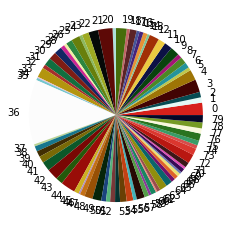

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread, imsave

def k_means_image(testimage, result, percentages, colors=80):
    imagen = imread(testimage)
    ancho, alto, _ = imagen.shape
    imagen = imagen.reshape((ancho*alto), 3)
    kmeans = KMeans(n_clusters=colors).fit(imagen)
    etiquetas = kmeans.predict(imagen)
    
    paleta_colores = np.array(kmeans.cluster_centers_).astype(int)
    imagen_nueva = np.copy(imagen)
    for i in range(len(imagen_nueva)):
        imagen_nueva[i] = paleta_colores[etiquetas[i]]

    imagen_nueva = imagen_nueva.reshape(ancho, alto, 3)
    imsave(result, imagen_nueva)

    labels = list(kmeans.labels_)
    centroides = kmeans.cluster_centers_
    porcentajes = []
    for i in range(len(centroides)):
        j = labels.count(i)
        j = j/len(labels)
        porcentajes.append(j)

    plt.pie(porcentajes, colors=np.array(centroides/255), labels=np.arange(len(centroides)))
    plt.savefig(percentages)

k_means_image('k-means_test_img.jpg', 'k-means-result.jpg', 'k-means-result-percent.png')

### 3. que aplicación le daría a este algoritmo 

Lo aplicaría para realizar un procesamiento de imagenes. En muchos casos no es necesario que las imágenes tengan una excelente definición, entonces podria aplicarse este algoritmo para disminuír su definición y por consiguiente su tamaño.

### 5. Aplicar el metodo de mean shift en el dataset de iris 

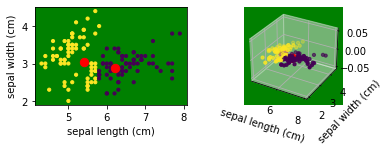

In [18]:
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

#se carga el dataset y se recupera info de los sepalos
iris = load_iris()
sepal_data = iris.data[:,:2]

#se crea una instancia de MeanShift y se le agrega la info de los sepalos 
ms_sepals = MeanShift().fit(sepal_data)

#centroides y labels
centroids_sepals = ms_sepals.cluster_centers_
labels_sepals = ms_sepals.labels_

#gráficos
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222,projection="3d")

ax1.scatter(sepal_data[:, 0], sepal_data[:, 1], c=labels_sepals, s=10)
ax1.scatter(centroids_sepals[:, 0], centroids_sepals[:, 1], c="red", s=70)
ax2.scatter(sepal_data[:, 0], sepal_data[:, 1], c=labels_sepals, s=10)
ax2.scatter(centroids_sepals[:, 0], centroids_sepals[:, 1], c="red", s=70)

ax1.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax2.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

ax1.set_facecolor("green")
ax2.set_facecolor("green")

plt.savefig('mean_shift_on_iris.png')